# Facebook Message Analyzer

In [208]:
import os
import json
import numpy as np
import pylab as pl
import datetime

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 10
MESSAGE_BOUND = 100000

In [209]:
def get_json_data(chat):
    try:
        json_location = CURRENT_DIRECTORY + "/inbox/" + chat + "/message_1.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)

In [210]:
chats = os.listdir(CURRENT_DIRECTORY + "/inbox/")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_tod = {}
final_data_words = {}
invalid_message_count = 0

In [222]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    url = chat + '/message_1.json'
    json_data = get_json_data(chat)
    # print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

#print('Finished processing chats...')

Analyzing 667 chats...


In [212]:
#print(person_to_times)

In [213]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}
    person_to_tod = {}

    #print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.datetime.fromtimestamp(time/1000.0))
            
            person_to_tod[name] = person_to_tod.get(name, [])
            tod = datetime.datetime.fromtimestamp(time/1000.0).replace(year=2, month=2, day=2)

            #print(tod)
            person_to_tod[name].append(tod)

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words
    final_data_tod[i] = person_to_tod


print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

Found 4075 invalid messages...
Found 388 chats with 10 messages or more


In [214]:
#print(sorted_chats[50][2])

In [215]:
#print(person_to_tod)

In [216]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        #print(i,person)
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    #pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

def plot_histogram_tod(chat_number):
    person_to_tod = final_data_tod[chat_number]
    pl.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

    pl.xlabel('Time of Day')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time of Day')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_tod):
        #print(i,person)
        plotted_data = person_to_tod[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    #pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()
    
def plot_histogram_dow(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

    pl.xlabel('Day of Week (0=Monday)')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Day of Week')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    dow_count = {}
    for i in range(7):
        dow_count[i] = 0
    for i , person in enumerate(person_to_times):
        #print(i,person)
        data = person_to_times[person]
        plotted_data = []
        for item in data:
            plotted_data.append(item.weekday())
            dow_count[item.weekday()] += 1
        
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    
    #pl.plot(wod_count, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    print(dow_count)
    pl.bar(range(len(dow_count)), list(dow_count.values()), align='center')

    #pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()
    
def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_histogram_dow(chat_number)
    plot_histogram_tod(chat_number)

    plot_num_messages(chat_number)
    plot_histogram_time(chat_number)
    plot_histogram_words(chat_number)


In [217]:
print(type(final_data_times))
print(len(final_data_times))
print(len(final_data_tod))

#print(final_data_times.keys())
#print(final_data_times[0])

<class 'dict'>
388
388


In [218]:
#print(final_data_tod.keys())
#print(final_data_tod[0])

{0: 1085, 1: 1389, 2: 1276, 3: 1453, 4: 1134, 5: 2020, 6: 1515}


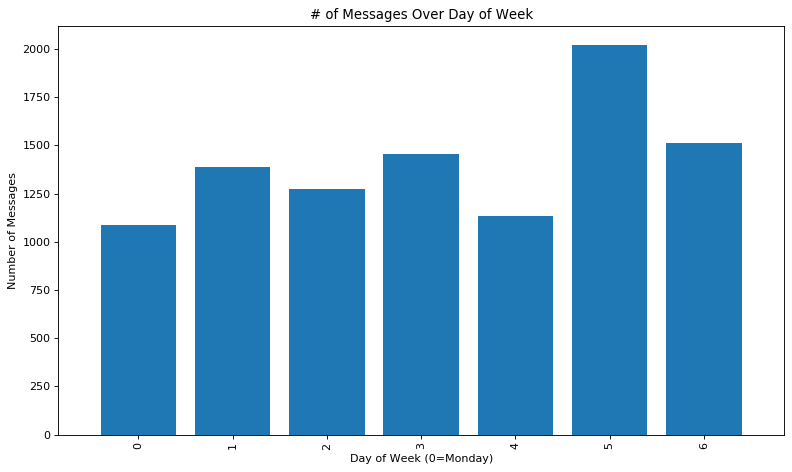

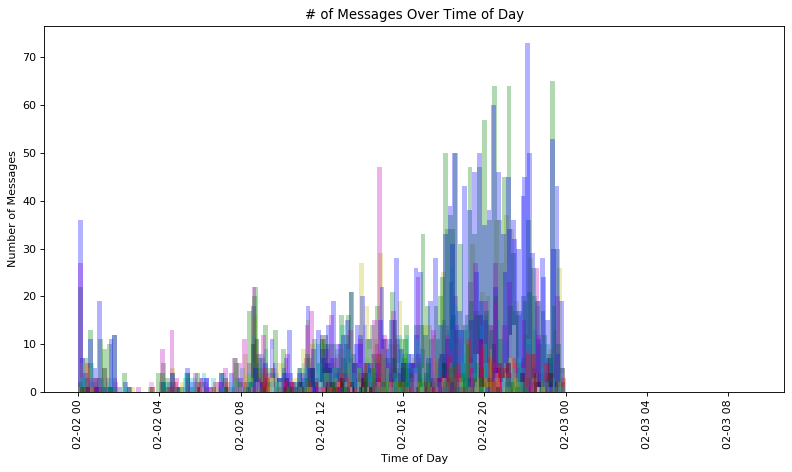

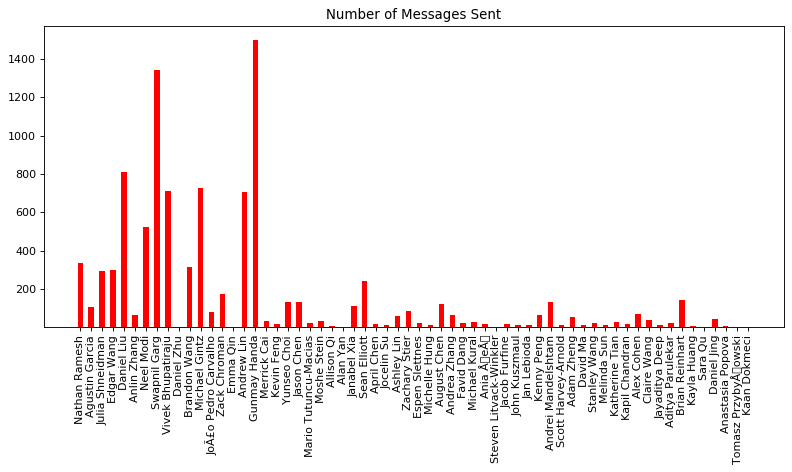

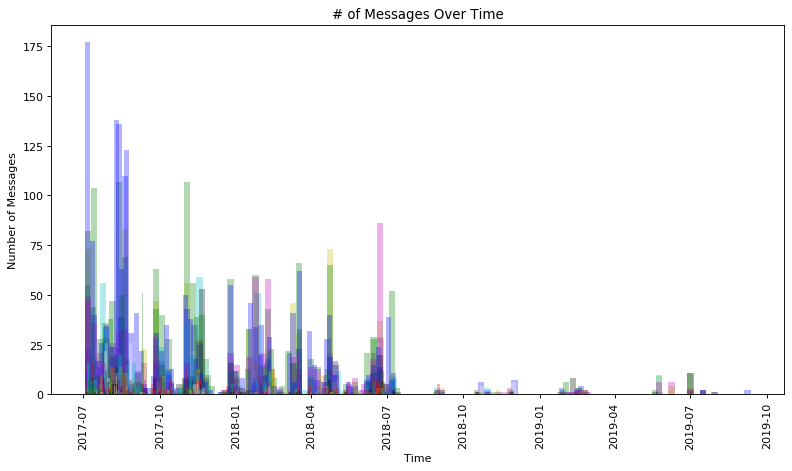

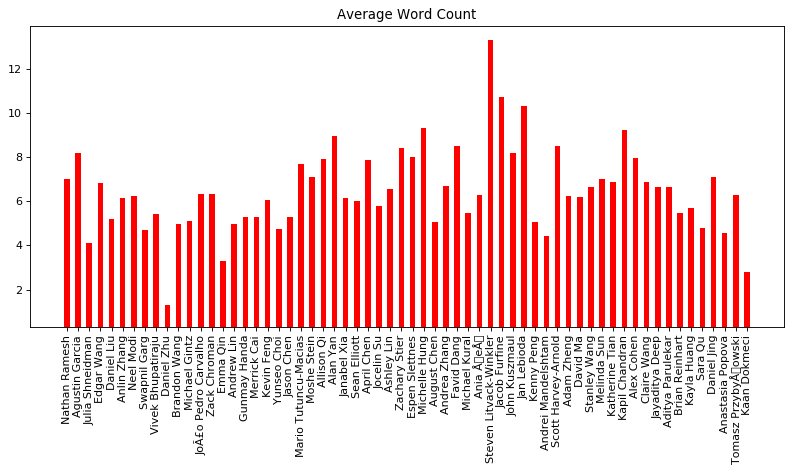

In [219]:
plot(0)

In [220]:
#plot(1)

<b> Current Features For a Given Chat: </b>
<ul> 
    <li> Number of Messages Sent </li> 
    <li> Messages Sent Over Time </li> 
    <li> Average Word Count </li>
</ul>